In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("/content/drive/MyDrive/Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [3]:
data["Date"] = pd.to_datetime(data["Date"],
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


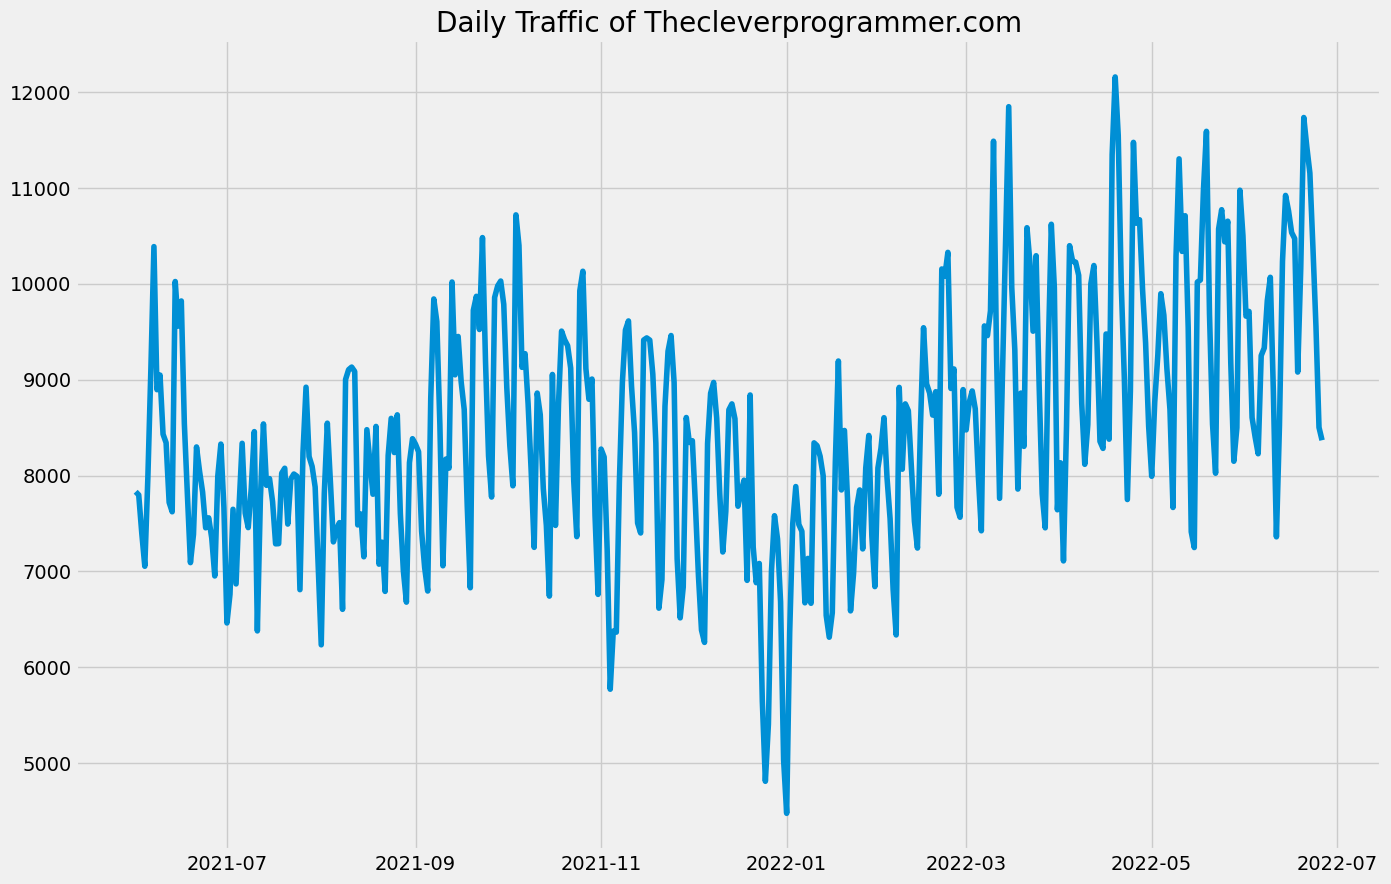

In [4]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 640x480 with 0 Axes>

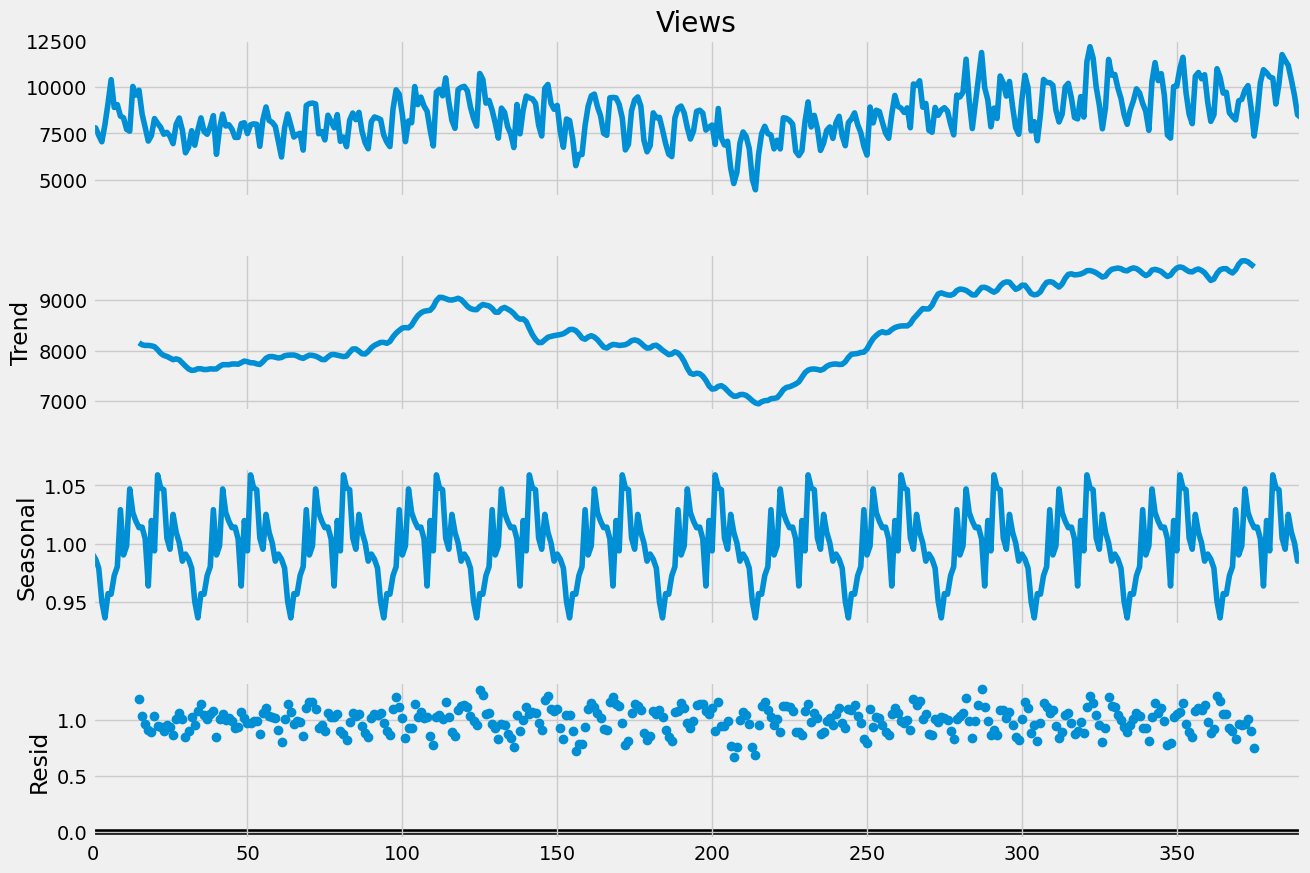

In [6]:
result = seasonal_decompose(data["Views"],
                            model='multiplicative',
                            period=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

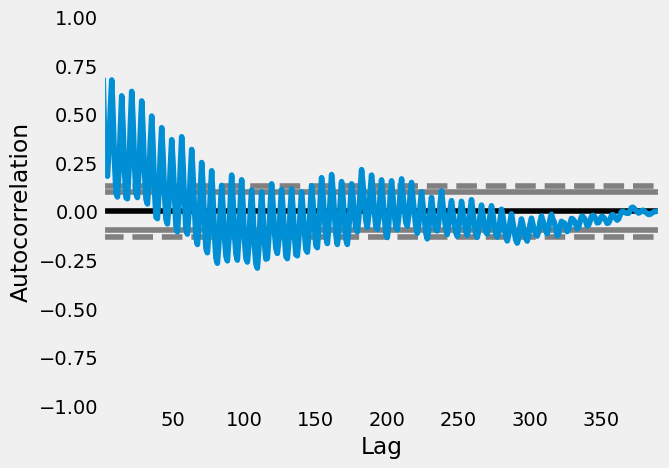

In [7]:
pd.plotting.autocorrelation_plot(data["Views"])

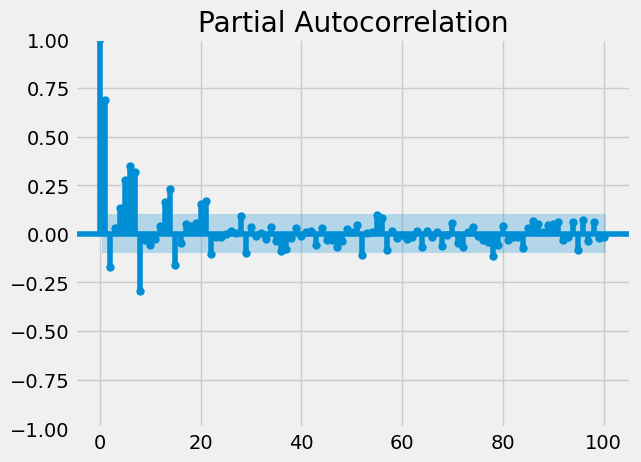

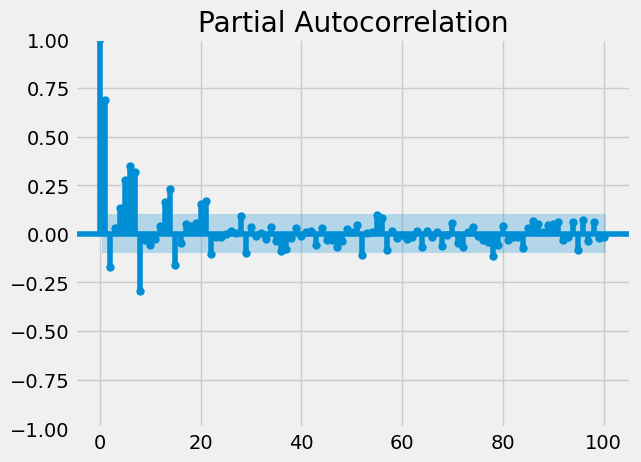

In [9]:
plot_pacf(data["Views"], lags = 100)

In [10]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3098.936
Date:                            Thu, 13 Feb 2025   AIC                           6227.873
Time:                                    09:56:40   BIC                           6286.896
Sample:                                         0   HQIC                          6251.298
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7687      0.129      5.953      0.000       0.516       1.022
ar.L2         -0.8007      0.135   

In [11]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9929.396286
392    10832.401683
393    10707.034126
394     9811.460375
395     8751.363257
396     8247.813883
397     8975.861035
398     9771.074082
399    10327.223405
400    10583.354048
401     9866.967279
402     9302.448014
403     9004.661607
404     9115.025870
405    10557.655644
406    11042.368748
407    10931.788634
408    10059.743461
409     9375.433350
410     8615.795977
411     9237.781936
412    10411.470047
413    10694.701336
414    10811.651113
415    10221.743484
416     9358.209740
417     8937.925664
418     9190.105670
419     9988.381124
420    10313.744200
421    10742.878221
422     9860.265300
423     9448.485062
424     8958.563020
425     8919.589735
426    10277.095800
427    10956.517306
428    10922.462035
429    10317.235571
430     9358.715529
431     8684.788228
432     8792.123954
433    10188.611781
434    10633.501423
435    10895.437208
436    10376.878791
437     9261.809775
438     9156.138793
439     9435.494309
440    10419.843463


<Axes: >

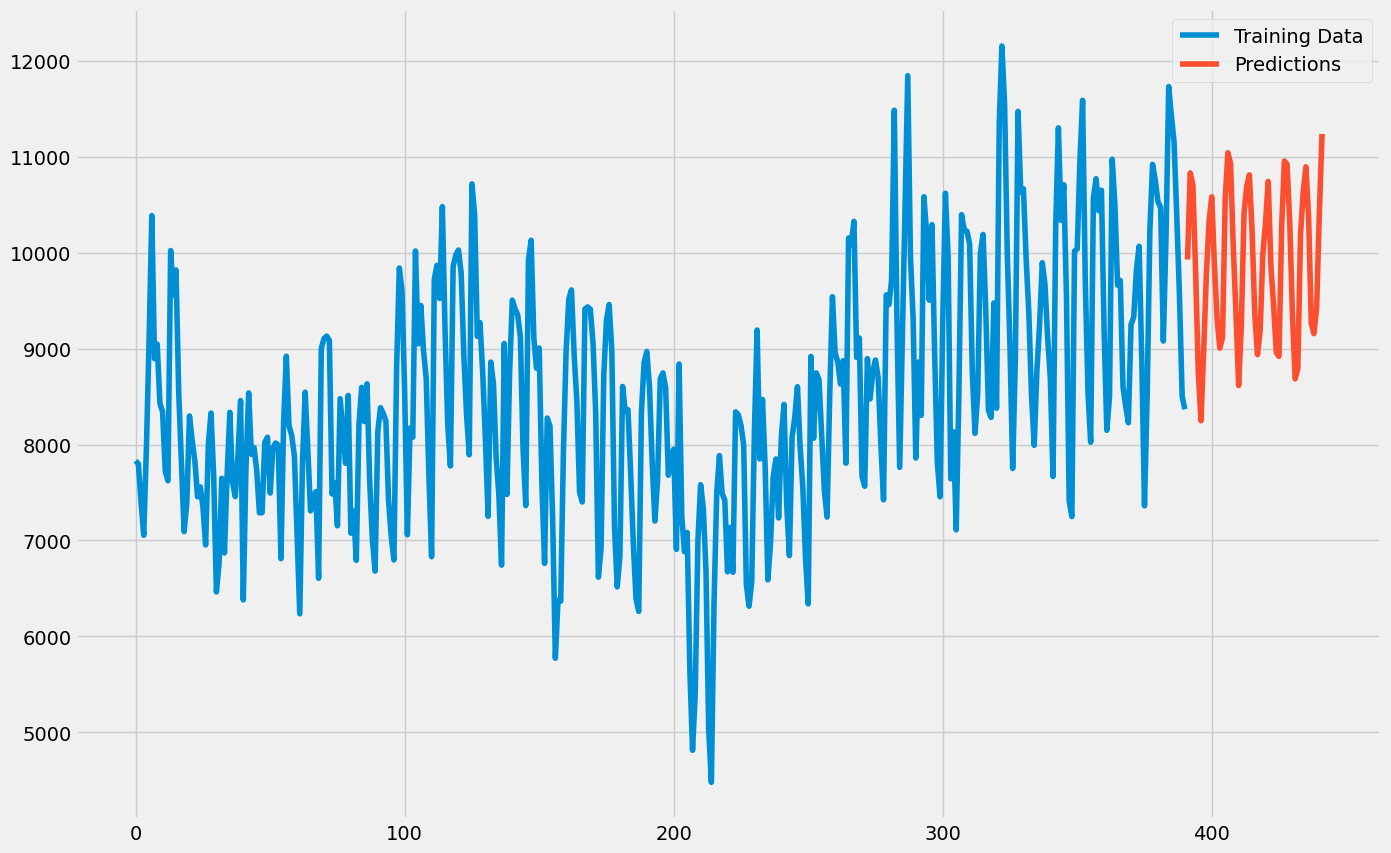

In [12]:
data["Views"].plot(legend=True, label="Training Data",
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")

CSV dosyasının yolunu girin: /content/drive/MyDrive/Thecleverprogrammer.csv
         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


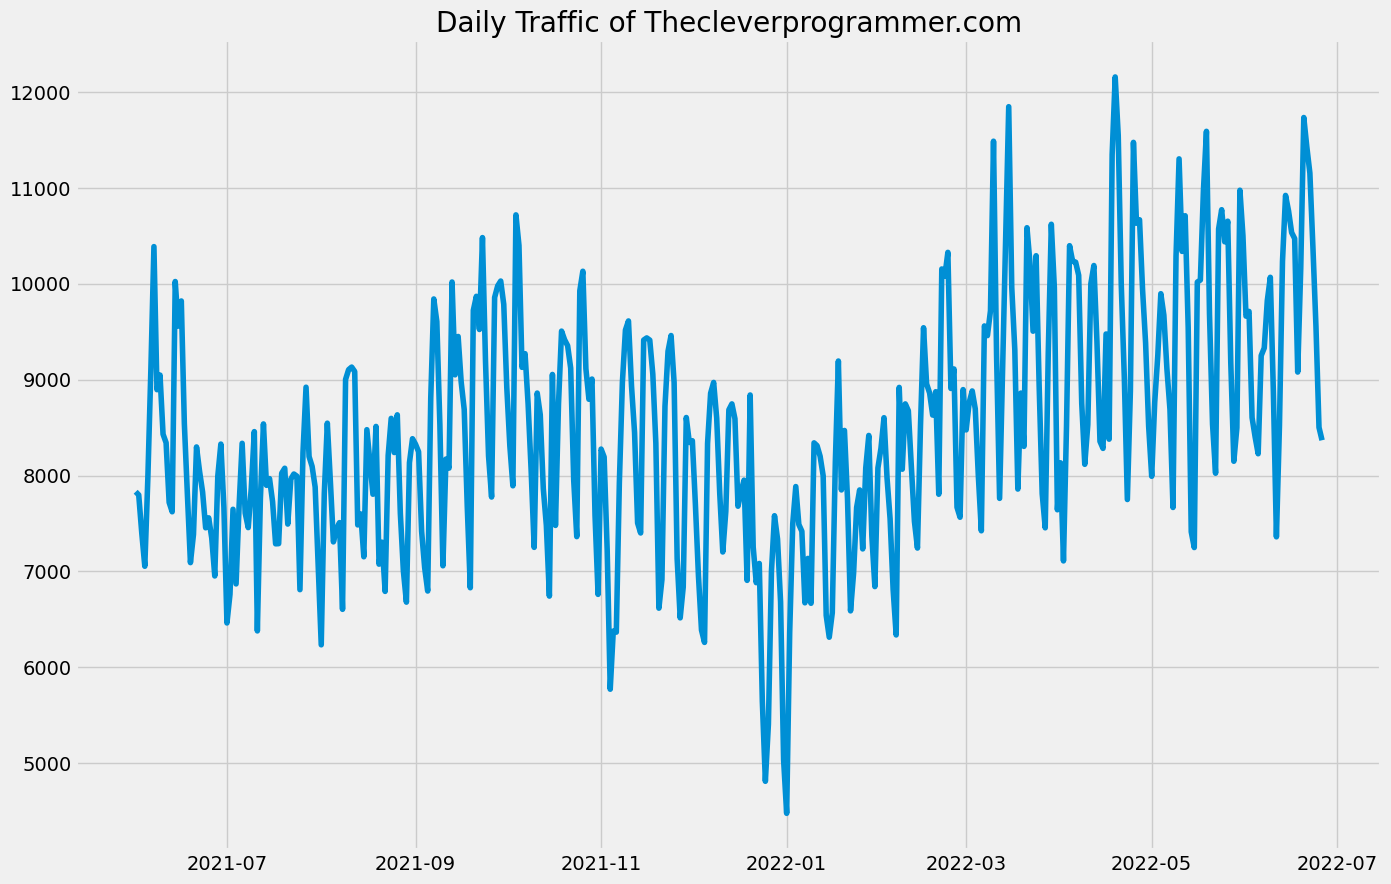

KeyboardInterrupt: Interrupted by user

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf

# Kullanıcıdan dosya yolunu alma
file_path = input("CSV dosyasının yolunu girin: ")

# Veri okuma
data = pd.read_csv(file_path)
print(data.head())

# Tarih sütununu datetime formatına çevirme
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
print(data.info())

# Görselleştirme
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

# Seasonal Decomposition
period = int(input("Seasonal decomposition için period değerini girin (örneğin: 30): "))
result = seasonal_decompose(data["Views"], model='multiplicative', period=period)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

# Otokorelasyon Grafiği
pd.plotting.autocorrelation_plot(data["Views"])

# PACF Grafiği
plot_pacf(data["Views"], lags=100)

# ARIMA model parametreleri için input alma
p = int(input("ARIMA modelinin p parametresini girin: "))
d = int(input("ARIMA modelinin d parametresini girin: "))
q = int(input("ARIMA modelinin q parametresini girin: "))

# SARIMAX Modeli
seasonal_period = int(input("Seasonal period (12 aylık dönem) için değer girin: "))
model = sm.tsa.statespace.SARIMAX(data['Views'],
                                  order=(p, d, q),
                                  seasonal_order=(p, d, q, seasonal_period))
model = model.fit()
print(model.summary())

# Tahmin Süresi
forecast_length = int(input("Kaç günlük tahmin yapılacak? : "))
predictions = model.predict(len(data), len(data) + forecast_length)
print(predictions)

# Sonuçları Görselleştirme
data["Views"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")
plt.show()
